# Bellabeat Case Study
Data Analysis method: Ask -> Prepare -> Process -> Analyze -> Share -> Act

## ASK


#### The Business Task
1) Analyze the data to understand the trends in smart device usage.  
2) Make recommendations on how to modify device for better usage. 
#### Stakeholders
* Primary: Bellabeat’s cofounder and Chief Creative Officer.  
* Secondary: Bellabeat marketing analytics team and executive team.  

## Prepare   
* FitBit Fitness Tracker Data: 30 eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.  
* Data Source: Kaggle

## Process

**Load R packages and CSV files**

In [1]:
install.packages("lubridate")

library(tidyverse)
library(lubridate)

activity <- read_csv("Dataset/dailyActivity_merged.csv")
calories <- read_csv("Dataset/dailyCalories_merged.csv")
intensities <- read_csv("Dataset/dailyIntensities_merged.csv")
steps <- read_csv("Dataset/dailySteps_merged.csv")
sleep <- read_csv("Dataset/sleepDay_merged.csv")
weight <- read_csv("Dataset/weightLogInfo_merged.csv")

package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\asus\AppData\Local\Temp\Rtmpq4YJJk\downloaded_packages


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:dplyr':

    intersect, setdiff, union

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Parsed with column specification:
cols(
  Id = col_double(),
  ActivityDate = col_ch

In [2]:
glimpse(activity)

Observations: 940
Variables: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396...
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/...
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13...
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, ...
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, ...
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, ...
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, ...
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, ...
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66...
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27,...
$ LightlyActiveMinut

In [3]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 24

[1] 8

* Not Enough participant tracked their weight

In [4]:
head(activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


## Analyze

**Clean and Manipulate the Data**
* Merge the data.
* Change formate of Date column from character to Date type.
* Create a new column with Weekdays.
* Create a new column TotalActiveMinutes summing up all active minutes.

In [5]:
activity_w_calories<- merge(activity, calories, by = c("Id","Calories"))

In [6]:
daily_merged <- merge(activity_w_calories, sleep, by = "Id", all = TRUE) %>% 
  drop_na() %>% 
  select(-SleepDay, -ActivityDay, -TrackerDistance) %>% 
  rename(Date = ActivityDate)

In [7]:
daily_merged$Date <- as.Date(daily_merged$Date, "%m/%d/%Y")

In [8]:
daily_merged$Weekdays<- wday(daily_merged$Date, label = TRUE, abbr = FALSE)

In [9]:
daily_merged <- daily_merged  %>% 
    mutate(TotalActiveMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)

In [10]:
head(daily_merged)

Id,Calories,Date,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Weekdays,TotalActiveMinutes
1503960366,1783,2016-05-11,12770,8.13,0,2.56,1.01,4.55,0,36,23,251,669,1,327,346,Wednesday,310
1503960366,1783,2016-05-11,12770,8.13,0,2.56,1.01,4.55,0,36,23,251,669,2,384,407,Wednesday,310
1503960366,1783,2016-05-11,12770,8.13,0,2.56,1.01,4.55,0,36,23,251,669,1,412,442,Wednesday,310
1503960366,1783,2016-05-11,12770,8.13,0,2.56,1.01,4.55,0,36,23,251,669,2,340,367,Wednesday,310
1503960366,1783,2016-05-11,12770,8.13,0,2.56,1.01,4.55,0,36,23,251,669,1,700,712,Wednesday,310
1503960366,1783,2016-05-11,12770,8.13,0,2.56,1.01,4.55,0,36,23,251,669,1,304,320,Wednesday,310


In [11]:
colnames(daily_merged)

[1] "Id"                       "Calories"                
 [3] "Date"                     "TotalSteps"              
 [5] "TotalDistance"            "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "TotalSleepRecords"        "TotalMinutesAsleep"      
[17] "TotalTimeInBed"           "Weekdays"                
[19] "TotalActiveMinutes"

**Summary of daily_merged**

In [12]:
daily_merged  %>% 
    select(TotalSteps, TotalDistance, Calories)  %>% 
    summary()

   TotalSteps      TotalDistance       Calories   
 Min.   :    0.0   Min.   : 0.000   Min.   :   0  
 1st Qu.:   12.5   1st Qu.: 0.010   1st Qu.:1698  
 Median : 6530.0   Median : 4.530   Median :2018  
 Mean   : 6385.3   Mean   : 4.506   Mean   :2218  
 3rd Qu.:10524.0   3rd Qu.: 7.380   3rd Qu.:2640  
 Max.   :22988.0   Max.   :17.950   Max.   :4900  

In [13]:
daily_merged %>% 
    select(VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes) %>% 
    summary()

print(mean(daily_merged$LightlyActiveMinutes)/mean(daily_merged$TotalActiveMinutes))

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:  0.0        1st Qu.: 687.0  
 Median :  0.00    Median :  4.00      Median :174.0        Median : 782.0  
 Mean   : 18.69    Mean   : 13.87      Mean   :157.2        Mean   : 936.9  
 3rd Qu.: 28.00    3rd Qu.: 20.00      3rd Qu.:240.0        3rd Qu.:1440.0  
 Max.   :210.00    Max.   :143.00      Max.   :518.0        Max.   :1440.0  

[1] 0.8283708


In [14]:
daily_merged %>% 
    select(TotalMinutesAsleep,TotalTimeInBed,TotalActiveMinutes) %>% 
    summary()

 TotalMinutesAsleep TotalTimeInBed  TotalActiveMinutes
 Min.   : 58.0      Min.   : 61.0   Min.   :  0.0     
 1st Qu.:359.0      1st Qu.:402.0   1st Qu.:  0.0     
 Median :427.0      Median :459.0   Median :227.0     
 Mean   :416.8      Mean   :455.7   Mean   :189.7     
 3rd Qu.:490.0      3rd Qu.:527.0   3rd Qu.:296.0     
 Max.   :796.0      Max.   :961.0   Max.   :540.0     

**Key Findings**
* Average steps taken were 6385.
* Average distance were 4.5 miles.
* Lightly Active Minutes took up 82.8% of all.


## Share
### Creating Visualizations

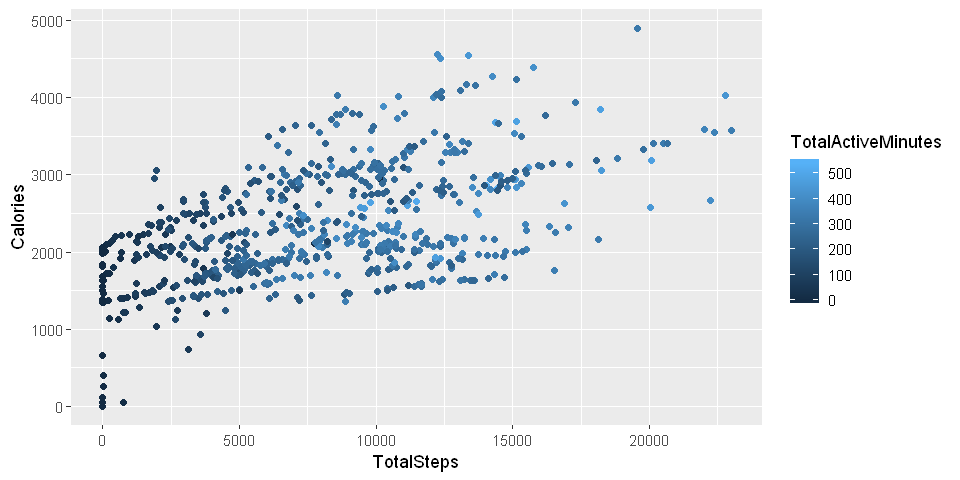

In [15]:
options(repr.plot.width = 8, repr.plot.height =4)
ggplot(data = daily_merged, mapping = aes(x = TotalSteps, y =Calories, color = TotalActiveMinutes)) +
  geom_point()

* Positive relationshp between total steps and calories burned.
* The data shows that even if there is Less total steps and less total active minutes then also we can see high calories burn, which can be due to other activites other then Walking

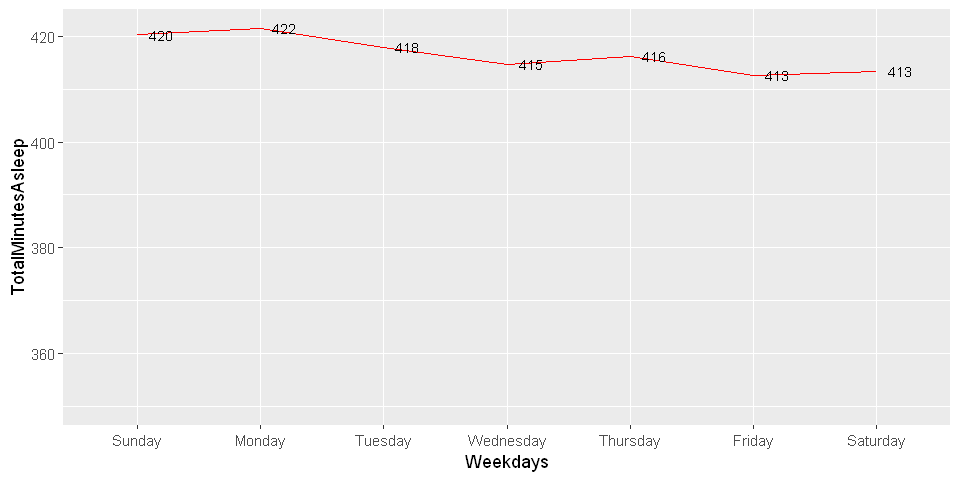

In [16]:
average_very_active_minutes <- daily_merged %>% 
  group_by(Weekdays) %>% 
  summarise_at(vars(TotalMinutesAsleep),
               list(TotalMinutesAsleep = mean))

ggplot(average_very_active_minutes, aes(x=Weekdays,y=TotalMinutesAsleep, group=1))+
  geom_line(color = "red")+
  expand_limits(y = 350)+
  geom_text(aes(label=round(TotalMinutesAsleep, digits=0), hjust=-0.5, vjust=0.5),size=3)

* The data shows that the total sleep time is equally distributed among all weekdays. The average sleep time is 416 minutes, which means on average, participants have adequate sleep

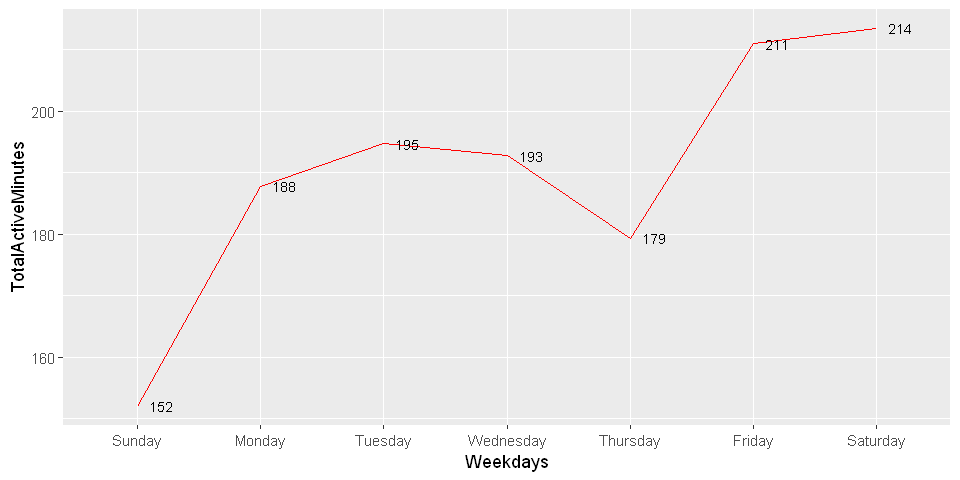

In [17]:
average_very_active_minutes <- daily_merged %>% 
  group_by(Weekdays) %>% 
  summarise_at(vars(TotalActiveMinutes),
               list(TotalActiveMinutes = mean))

ggplot(average_very_active_minutes, aes(x=Weekdays,y=TotalActiveMinutes, group=1))+
  geom_line(color = "red")+
  geom_text(aes(label=round(TotalActiveMinutes, digits=0), hjust=-0.5, vjust=0.5),size=3)

* The data shows that on average, people are MOST active on Saturdays with 214 total active minutes and the LEAST active on Sundays with 152 total active minutes.

## Act

 #### Insights/Recommendations

1) Majority of the participants didn't track their weight this can be due to manually inputing the data everyday. It may be appealing to users if Bellabeat offered **auto tracking for their weight** to make the process easier.  
  
2) Average daily steps are 6385 which is less for having healthy benefit, around 8000 steps per day is considered healthy. Bellabeat may **encourage/promote people to walk and exercise** for their health.  
  
3) **Adding more catagoies to track the calories burn** would help people to understand their lifestyle.  
  
4) The average sedentary minutes are 936.9 minutes (15.6 hrs). **Adding reminder to stand and move** by notification or vibration.